# Data Acquisition, Analysis and Visualization

## Group 04 - Final Project on Crime Database

# Dataset Loading

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
CD = pd.read_csv("Downloads/Crime Dataset for Data Acquisition.csv") #Dataset Loaded
CD.head(5)

,Year,City,Violations,Statistics,Value
0,2021,"Toronto, Ontario [35535]","Total, all Criminal Code violations (including...",Actual incidents,205536.00
1,2022,"Toronto, Ontario [35535]","Total, all Criminal Code violations (including...",Actual incidents,244807.00
2,2023,"Toronto, Ontario [35535]","Total, all Criminal Code violations (including...",Actual incidents,295341.00
3,2024,"Toronto, Ontario [35535]","Total, all Criminal Code violations (including...",Actual incidents,304082.00
4,2021,"Toronto, Ontario [35535]","Total, all Criminal Code violations (including...","Rate per 100,000 population",3225.03


# Check Missing Values

In [6]:
# Check for missing values
missing_values = CD.isnull().sum()
print(missing_values)

Year           0
City           0
Violations     0
Statistics     0
Value         70
dtype: int64


In [7]:
# Fill missing values based on provided instructions
CD.fillna({
    'Value': 0
}, inplace=True) #Replace the Missing Values with 0 or NA
CD.head(5)

# Check for missing values after filling NA/Missing Value
missing_values = CD.isnull().sum()
print(missing_values)

Year          0
City          0
Violations    0
Statistics    0
Value         0
dtype: int64


# Descriptive Statistics

In [9]:
# Filter only actual incident data
CD_actual = CD[CD["Statistics"] == "Actual incidents"]

In [10]:
# Group by city and violation type, then describe VALUE
violation_stats = CD_actual.groupby(["Violations"])["Value"].describe()

# Display results
violation_stats.head(30)

,count,mean,std,min,25%,50%,75%,max
Violations,,,,,,,,
"Assault, level 1 [1430]",20.0,6137.85,8898.212193,340.0,1294.50,2130.0,3650.50,26821.0
Attempted murder [1210],20.0,37.20,63.998026,0.0,3.75,6.5,15.00,176.0
Criminal negligence causing death [1150],20.0,2.10,3.726152,0.0,0.00,1.0,1.25,14.0
Homicide [110],20.0,29.65,49.023383,0.0,4.00,6.5,11.50,133.0
"Murder, first degree [1110]",20.0,15.05,27.097242,0.0,0.00,3.0,5.50,74.0
Robbery [1610],20.0,1060.60,1717.631031,38.0,173.25,366.5,392.00,5094.0
"Sexual assault, level 1 [1330]",20.0,1134.90,1578.873346,96.0,266.50,536.5,567.25,4622.0
Total drug violations [401],20.0,1055.00,1479.987696,90.0,175.25,415.5,645.00,4192.0
Total impaired driving [910],20.0,1374.65,1958.388846,115.0,398.50,463.0,694.75,5267.0


 # Data Visualization - 01

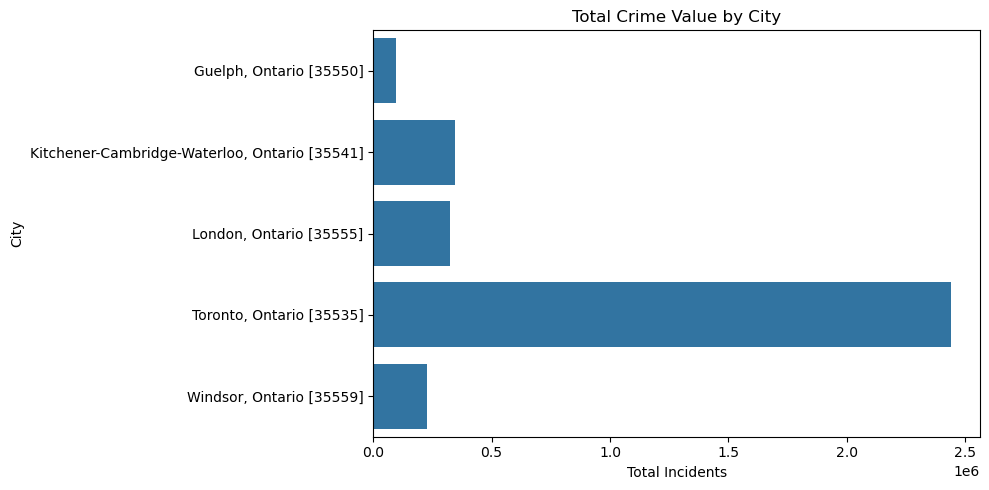

In [24]:
# Bar Plot – Total Crime by City
plt.figure(figsize=(10, 5))
city_data = CD.groupby('City')['Value'].sum().reset_index()
sns.barplot(data=city_data, x='Value', y='City')
plt.title('Total Crime Value by City')
plt.xlabel('Total Incidents')
plt.ylabel('City')
plt.tight_layout()
plt.show()

# Data Visualization - 02

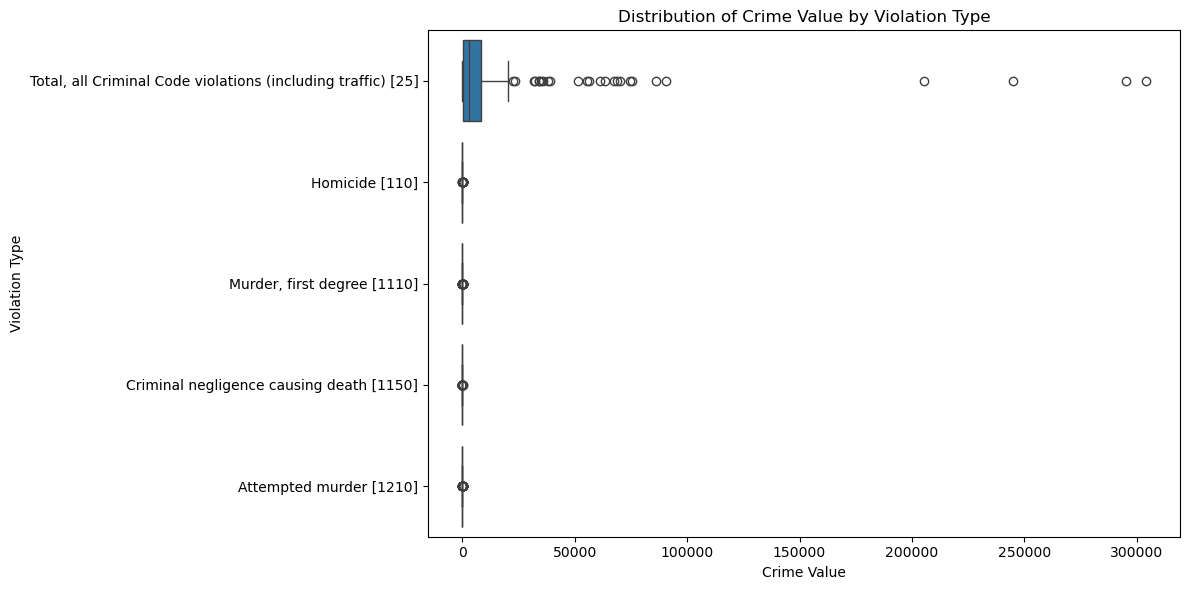

In [27]:
# Box Plot – Crime Value by Violation Type (Top 5)
top_violations = CD['Violations'].value_counts().index[:5]
top_cities = CD['City'].value_counts().index[:5]
CD_top = CD[CD['Violations'].isin(top_violations) & CD['City'].isin(top_cities)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=CD_top, x='Value', y='Violations')
plt.title('Distribution of Crime Value by Violation Type')
plt.xlabel('Crime Value')
plt.ylabel('Violation Type')
plt.tight_layout()
plt.show()

# Data Visualization - 03

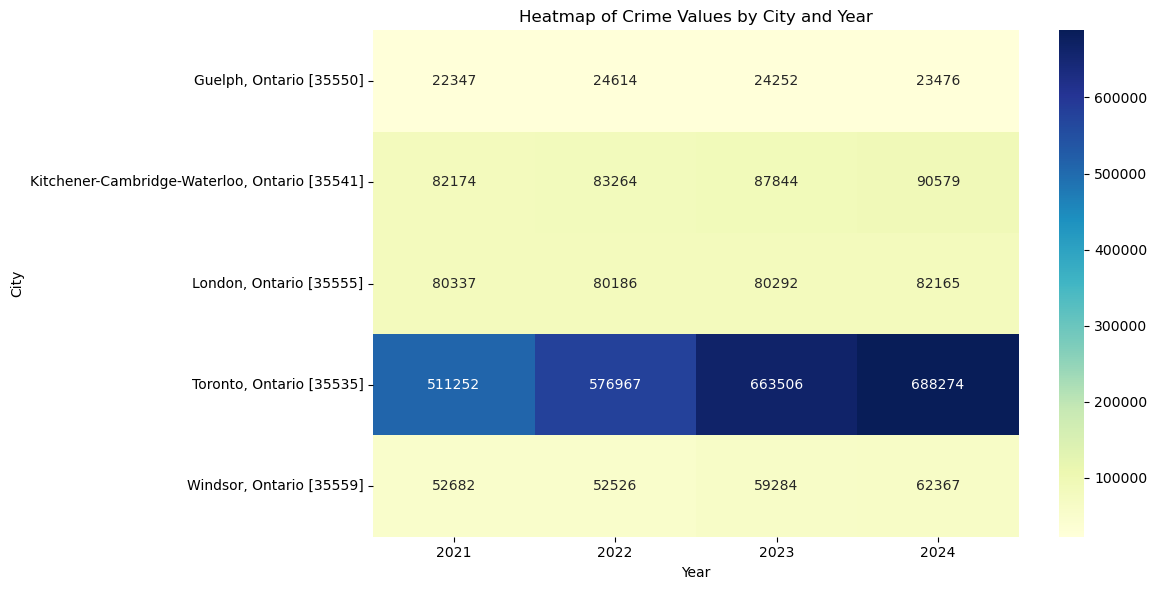

In [30]:
# Heatmap – Crime by City and Year
heatmap_data = CD.pivot_table(index='City', columns='Year', values='Value', aggfunc='sum')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Heatmap of Crime Values by City and Year')
plt.xlabel('Year')
plt.ylabel('City')
plt.tight_layout()
plt.show()

# Descriptive Data Mining

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [42]:
# KMeans Clustering: Group similar cities by year
# Pivot: cities as rows, years as columns, values as total crime
city_year_matrix = CD_actual.pivot_table(index="City", columns="Year", values="Value", aggfunc="sum").fillna(0)

# Standardize for clustering
scaler = StandardScaler()
city_year_scaled = scaler.fit_transform(city_year_matrix)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
city_clusters = kmeans.fit_predict(city_year_scaled)

# Attach cluster labels
city_year_matrix["Cluster"] = city_clusters
clustered_cities = city_year_matrix.reset_index()

# Pivot Table: Recurring Violation + Statistic Combinations
violation_combo = CD.pivot_table(index="Violations", columns="Statistics", values="Value", aggfunc="count").fillna(0)

# Output results
clustered_cities, violation_combo.head(10)

(Year                                           City      2021      2022  \
 0                           Guelph, Ontario [35550]    7449.0    8228.0   
 1     Kitchener-Cambridge-Waterloo, Ontario [35541]   40030.0   40848.0   
 2                           London, Ontario [35555]   38351.0   38291.0   
 3                          Toronto, Ontario [35535]  240888.0  284633.0   
 4                          Windsor, Ontario [35559]   22488.0   22599.0   
 
 Year      2023      2024  Cluster  
 0       7792.0    7719.0        2  
 1      43357.0   44411.0        0  
 2      36565.0   35872.0        0  
 3     338837.0  349782.0        1  
 4      25112.0   26069.0        2  ,
 Statistics                                          Actual incidents  \
 Violations                                                             
 Assault, level 1 [1430]                                           20   
 Attempted murder [1210]                                           20   
 Criminal negligence causin

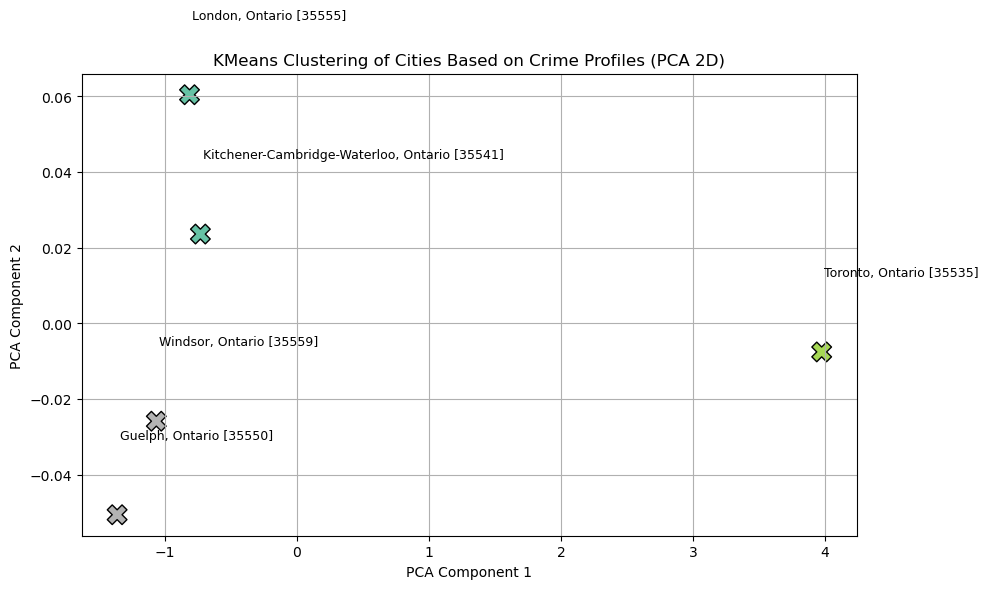

In [60]:
# Use PCA to reduce to 2D for visualization
pca = PCA(n_components=2)
city_pca = pca.fit_transform(city_year_scaled)

# Plot KMeans clusters in 2D
plt.figure(figsize=(10, 6))
scatter = plt.scatter(city_pca[:, 0], city_pca[:, 1], c=city_clusters, cmap="Set2", s=200, marker='X', edgecolors='black')

# Annotate each city
for i, city in enumerate(city_year_matrix.index):
    plt.text(city_pca[i, 0] + 0.02, city_pca[i, 1] + 0.02, city, fontsize=9)

plt.title("KMeans Clustering of Cities Based on Crime Profiles (PCA 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

# Linear Regression

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import numpy as np

# Features and target
X = CD_actual[["Year", "City", "Violations"]]
y = CD_actual["Value"]

# Preprocess categorical variables using one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown='ignore'), ["City", "Violations"])
    ],
    remainder="passthrough"  # Keep Year as numeric
)

# Build pipeline
model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and predict
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2, rmse

(-96.01162427982442, 14951.2523283482)

In [72]:
# Manual prediction using Linear Regression
sample_input = pd.DataFrame({
    "Year": [2024],  # Year
    "City": ["Toronto, Ontario [35535]"],  # City
    "Violations": ["Assault, level 1 [1430]"]  # Violation type
})

# Predict crime value
predicted_value_linear = model.predict(sample_input)

print("Predicted Crime Value (Linear Regression):", round(predicted_value_linear[0], 2))


Predicted Crime Value (Linear Regression): 33093.27


# Predictive Data Mining - Random Forest Regression

In [68]:
# Import Random Forest
from sklearn.ensemble import RandomForestRegressor

# Build pipeline with Random Forest Regressor
rf_model = Pipeline([
    ("preprocessor", preprocessor),  # reuse the same preprocessor
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])

# Fit model
rf_model.fit(X_train, y_train)

# Predict
rf_preds = rf_model.predict(X_test)

# Evaluate
rf_r2 = r2_score(y_test, rf_preds)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))

print("Random Forest R²:", round(rf_r2, 3))
print("Random Forest RMSE:", round(rf_rmse, 2))

Random Forest R²: 0.944
Random Forest RMSE: 360.43


In [70]:
# Manual prediction using Random Forest
sample_input = pd.DataFrame({
    "Year": [2024],  # Year
    "City": ["Toronto, Ontario [35535]"],  # City
    "Violations": ["Assault, level 1 [1430]"]  # Violation type
})

# Predict crime value
predicted_value = rf_model.predict(sample_input)

print("Predicted Crime Value:", round(predicted_value[0], 2))


Predicted Crime Value: 25183.97


# Statistical Inference

In [83]:
# Run hypothesis tests: Is there a significant difference in crime between Toronto and Windsor?
from scipy.stats import ttest_ind, f_oneway

# Get cities of interest — Toronto and Windsor
cities_of_interest = ["Toronto, Ontario [35535]", "Windsor, Ontario [35559]"]

# Filter for the two cities
CD_compare = CD_actual[CD_actual["City"].isin(cities_of_interest)]

# Create separate samples
toronto_values = CD_compare[CD_compare["City"] == "Toronto, Ontario [35535]"]["Value"]
windsor_values = CD_compare[CD_compare["City"] == "Windsor, Ontario [35559]"]["Value"]

# Run independent t-test
t_stat, p_value = ttest_ind(toronto_values, windsor_values, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")


T-statistic: 2.2115
P-value: 0.0329


In [85]:
if p_value < 0.05:
    print("✅ There is a significant difference in crime between Toronto and Windsor.")
else:
    print("❌ There is no significant difference in crime between Toronto and Windsor.")

✅ There is a significant difference in crime between Toronto and Windsor.


# Time Series Analysis

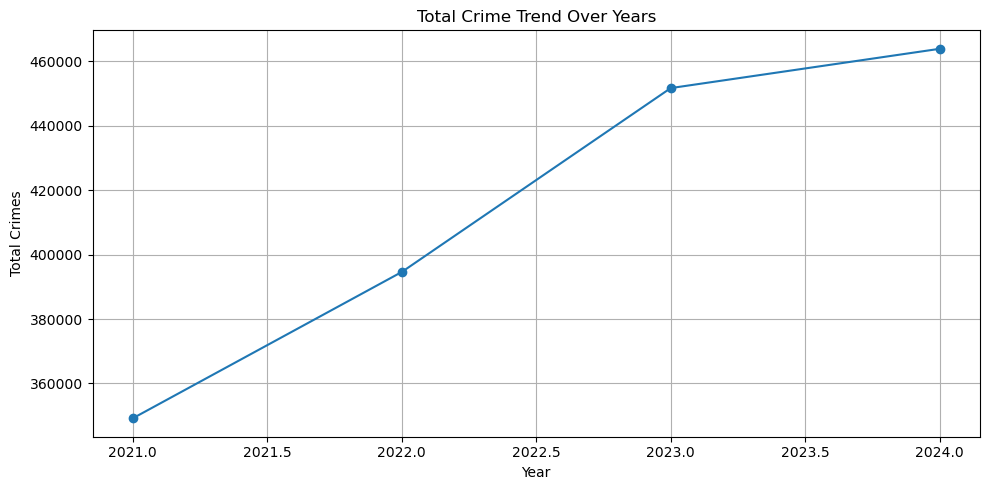

Forecast for 2025 (Exponential Smoothing)
Year      Forecasted Total Crimes
2025      504,272 crimes ✅


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [91]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Aggregate total crime per year
yearly_crime = CD_actual.groupby("Year")["Value"].sum()

# Plot time series
plt.figure(figsize=(10, 5))
plt.plot(yearly_crime.index, yearly_crime.values, marker='o', linestyle='-')
plt.title("Total Crime Trend Over Years")
plt.xlabel("Year")
plt.ylabel("Total Crimes")
plt.grid(True)
plt.tight_layout()
plt.show()

# Apply Exponential Smoothing for Forecasting
model = ExponentialSmoothing(yearly_crime, trend="add", seasonal=None)
fit_model = model.fit()
forecast = fit_model.forecast(1)

forecast_year = yearly_crime.index.max() + 1
forecast_value = forecast.iloc[0]

forecast_year, forecast_value

# Round the forecast value
forecast_value_rounded = round(forecast_value)

# Print formatted forecast
print("Forecast for 2025 (Exponential Smoothing)")
print(f"{'Year':<10}{'Forecasted Total Crimes'}")
print(f"{forecast_year:<10}{forecast_value_rounded:,} crimes ✅")